<a href="https://colab.research.google.com/github/Faiyazbhai/lab/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [40]:
covid_df = pd.read_csv('/content/country_wise_latest.csv')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [41]:
covid_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [42]:
df = covid_df.copy()

In [43]:
df = pd.concat([covid_df], axis=0)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [44]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe
1,Switzerland,34477,1978,30900,1599,65,1,200,5.74,89.62,6.40,33634,843,2.51,Europe
2,Barbados,110,7,94,9,0,0,0,6.36,85.45,7.45,106,4,3.77,Americas
3,Czechia,15516,373,11428,3715,192,2,0,2.40,73.65,3.26,14098,1418,10.06,Europe
4,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Mauritius,344,10,332,2,0,0,0,2.91,96.51,3.01,343,1,0.29,Africa
183,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
184,Costa Rica,15841,115,3824,11902,612,11,88,0.73,24.14,3.01,11534,4307,37.34,Americas
185,Guinea,7055,45,6257,753,47,2,105,0.64,88.69,0.72,6590,465,7.06,Africa


/tmp/ipython-input-1999003576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='WHO Region', palette='viridis')


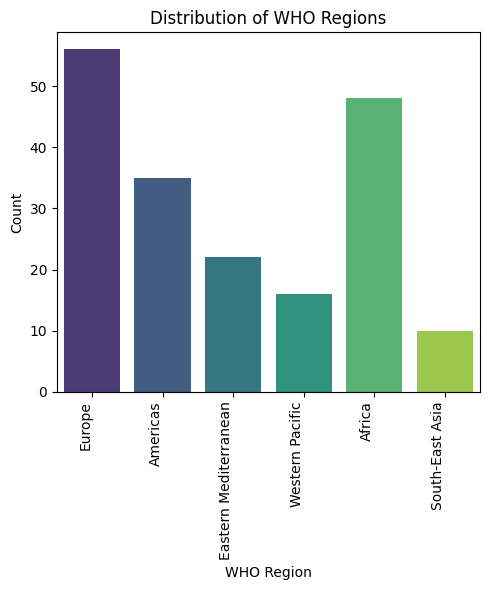

In [45]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x='WHO Region', palette='viridis')
plt.title('Distribution of WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1688875487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='WHO Region', palette='viridis')


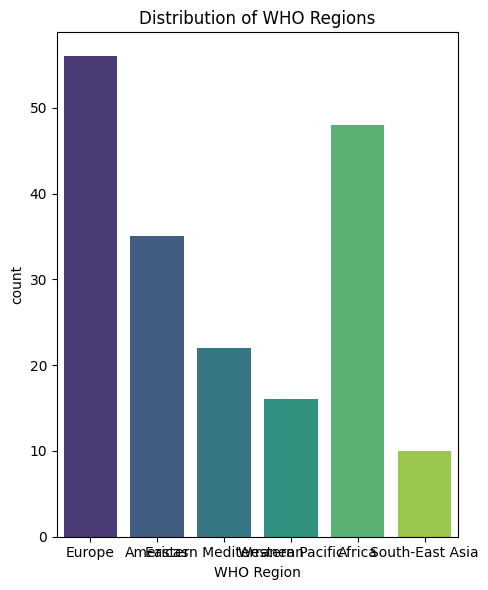

In [46]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x='WHO Region', palette='viridis')
plt.title('Distribution of WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [47]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# download NLTK data if not already done
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, use_stemming=True):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation & numbers
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)

    # 3. Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # 4. Tokenize
    tokens = text.split()

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Apply stemming OR lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [48]:
df["clean_text"] = df["WHO Region"].apply(lambda x: preprocess_text(x, use_stemming=False))

In [49]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,clean_text
0,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe,europe
1,Switzerland,34477,1978,30900,1599,65,1,200,5.74,89.62,6.40,33634,843,2.51,Europe,europe
2,Barbados,110,7,94,9,0,0,0,6.36,85.45,7.45,106,4,3.77,Americas,america
3,Czechia,15516,373,11428,3715,192,2,0,2.40,73.65,3.26,14098,1418,10.06,Europe,europe
4,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,eastern mediterranean


In [50]:
X = df["clean_text"]
y = df["WHO Region"]

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train) #training
y_pred_lr = lr.predict(X_test) #testing

#evaluation matrics
print(f'Accuracy score (Logistic Regression): {accuracy_score(y_test, y_pred_lr)}')
print(f'precision score (Logistic Regression): {precision_score(y_test,y_pred_lr, average="weighted")}')
print(f'recall score (Logistic Regression): {recall_score(y_test, y_pred_lr, average="weighted")}')
print(f'f1 score (Logistic Regression): {f1_score(y_test, y_pred_lr, average="weighted")}')
# roc_auc
# print(f'roc_auc score (Logistic Regression): {roc_auc_score(y_test, y_pred_lr, average="weighted")}')

Accuracy score (Logistic Regression): 1.0
precision score (Logistic Regression): 1.0
recall score (Logistic Regression): 1.0
f1 score (Logistic Regression): 1.0


In [53]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#evaluation matrics
print(f'Accuracy score (SVM): {accuracy_score(y_test, y_pred_svm)}')
print(f'precision score (SVM): {precision_score(y_test, y_pred_svm, average="weighted")}')
print(f'recall score (SVM): {recall_score(y_test, y_pred_svm, average="weighted")}')
print(f'f1 score (SVM): {f1_score(y_test, y_pred_svm, average="weighted")}')
# roc_auc
# print(f'roc_auc score (SVM): {roc_auc_score(y_test, y_pred_svm)}')

Accuracy score (SVM): 1.0
precision score (SVM): 1.0
recall score (SVM): 1.0
f1 score (SVM): 1.0


In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(f'precision score (Decision Tree): {precision_score(y_test, y_pred_dt, average="weighted")}')
print(f'recall score (Decision Tree): {recall_score(y_test, y_pred_dt, average="weighted")}')
print(f'f1 score (Decision Tree): {f1_score(y_test, y_pred_dt, average="weighted")}')
# roc_auc
# print(f'roc_auc score (Decision Tree): {roc_auc_score(y_test, y_pred_dt)}')

Decision Tree Accuracy: 1.0
precision score (Decision Tree): 1.0
recall score (Decision Tree): 1.0
f1 score (Decision Tree): 1.0


In [55]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f'precision score (Random Forest): {precision_score(y_test, y_pred_rf, average="weighted")}')
print(f'recall score (Random Forest): {recall_score(y_test, y_pred_rf, average="weighted")}')
print(f'f1 score (Random Forest): {f1_score(y_test, y_pred_rf, average="weighted")}')
# roc_auc
# print(f'roc_auc score (Random Forest): {roc_auc_score(y_test, y_pred_rf)}')

Random Forest Accuracy: 1.0
precision score (Random Forest): 1.0
recall score (Random Forest): 1.0
f1 score (Random Forest): 1.0


In [56]:
# confusion matrix func
def con_matrix(model_name, y_val, y_pred):
  cm = confusion_matrix(y_val, y_pred)

  plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
  })

  # create figure
  fig, ax = plt.subplots(figsize=(8, 6)) # Increased figure size for better readability
  # Define color map
  cmap = sns.color_palette('crest', as_cmap=True)

  # Get unique labels from y_val (true labels)
  unique_labels = sorted(y_val.unique())

  sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 12}, linewidths=0.5, linecolor='white',
            xticklabels=unique_labels, yticklabels=unique_labels) # Use unique_labels for ticks

  # Title for the confusion matrix
  title = f"Confusion Matrix - {model_name}"
  # Axis and Label ticks
  ax.set_title(title)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  # ax.xaxis.set_ticklabels(['0', '1']) # Removed hardcoded binary labels
  # ax.yaxis.set_ticklabels(['0', '1']) # Removed hardcoded binary labels

  # Gridline inside the confusion Matrix (optional, may not look good with many classes)
  # ax.hlines([1], *ax.get_xlim(), color='white', linewidth=4)
  # ax.vlines([1], *ax.get_ylim(), color='white', linewidth=4)

  plt.show()

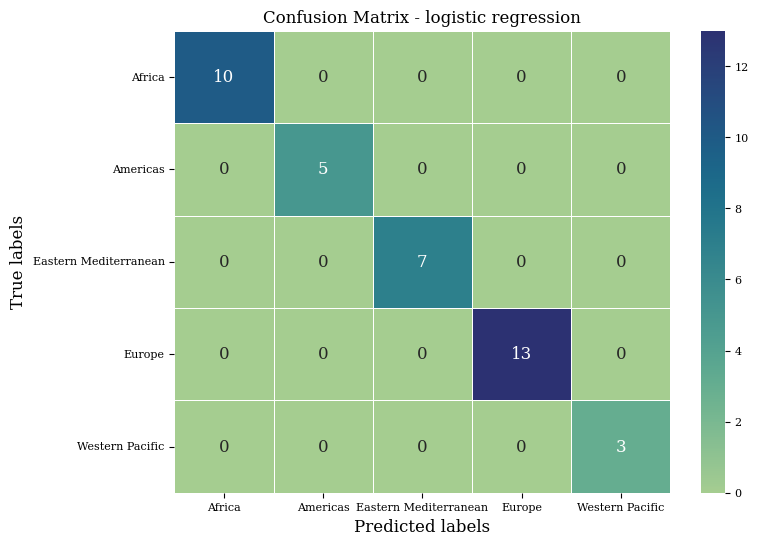

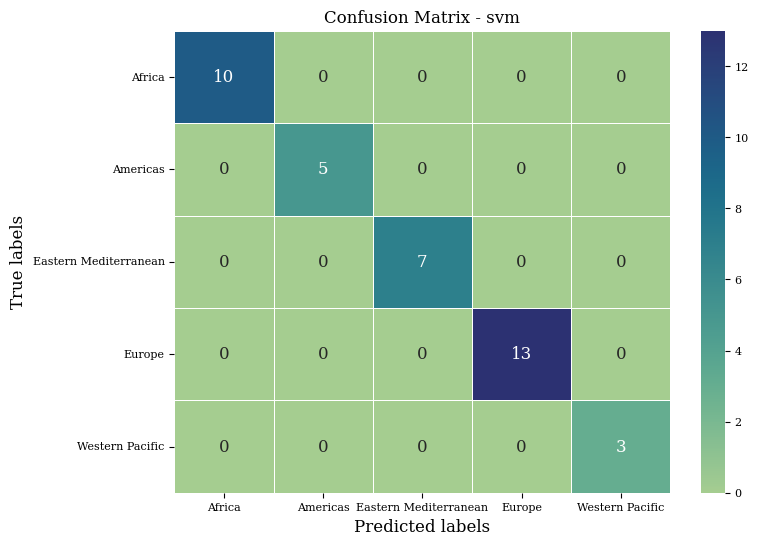

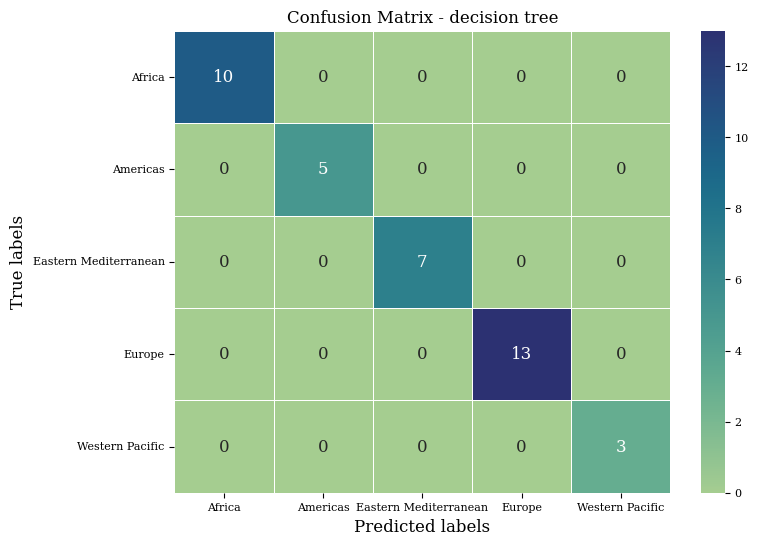

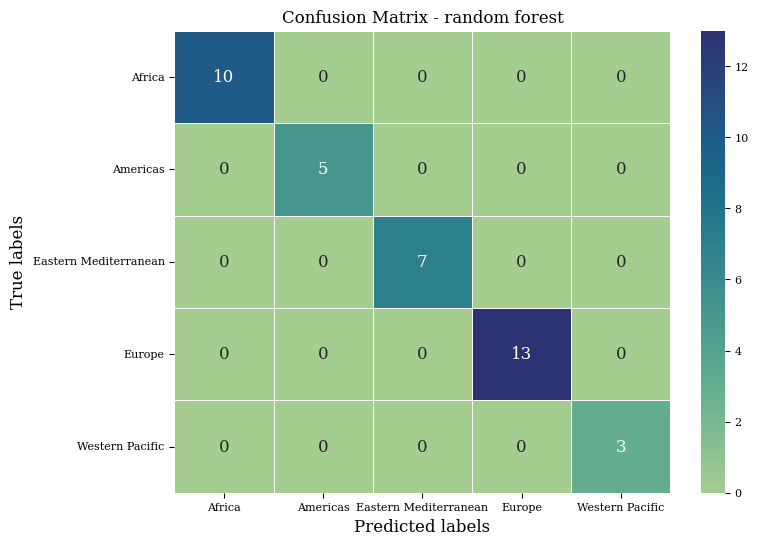

In [57]:
models = {
    'logistic regression': y_pred_lr,
    'svm': y_pred_svm,
    'decision tree': y_pred_dt,
    'random forest': y_pred_rf
}

for model_name, y_pred in models.items():
  con_matrix(model_name, y_test, y_pred)


In [58]:
# ROC curve for the models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 4))

models = {
    'logistic regression': lr,
    'svm': svm,
    'decision tree': dt,
    'random forest': rf
}
for model_name, model in models.items():

    if model_name == 'svm':
        # roc_auc for SVM with decision_function
        # try:
        #     y_proba = model.decision_function(X_test)
        #     fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        #     roc_auc = auc(fpr, tpr)
        #     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        # except Exception as e:
        #     print(f"Could not plot ROC for {model_name}: {e}")
        pass # Placeholder since ROC for multiclass SVM is complex

    else:
        # roc_auc for other models with predict_proba
        # try:
        #     y_proba = model.predict_proba(X_test)[:, 1]
        #     fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        #     roc_auc = auc(fpr, tpr)
        #     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        # except Exception as e:
        #      print(f"Could not plot ROC for {model_name}: {e}")
        pass # Placeholder since ROC for multiclass is not directly supported


# # graph details - keep graph details but remove plotting logic
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Fake news detection using Different ML models (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# Since ROC curve is not directly supported for multiclass with current approach,
# we will skip plotting the ROC curve for now.
print("ROC curve plotting is skipped as it's not directly supported for multiclass classification with the current approach.")

ROC curve plotting is skipped as it's not directly supported for multiclass classification with the current approach.


<Figure size 1000x400 with 0 Axes>

Error downloading wordnet: 
**********************************************************************
  Resource wordnet not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('wordnet')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/wordnet

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error downloading omw-1.4: 
**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Overall ROC AUC for Logistic Regression (weighted OVR): 1.00
Overall ROC AUC for SVM (weighted OVR): 1.00
Overall ROC AUC for Decision Tree (weighted OVR): 1.00
Overall ROC AUC for Random Forest (weighted OVR): 1.00


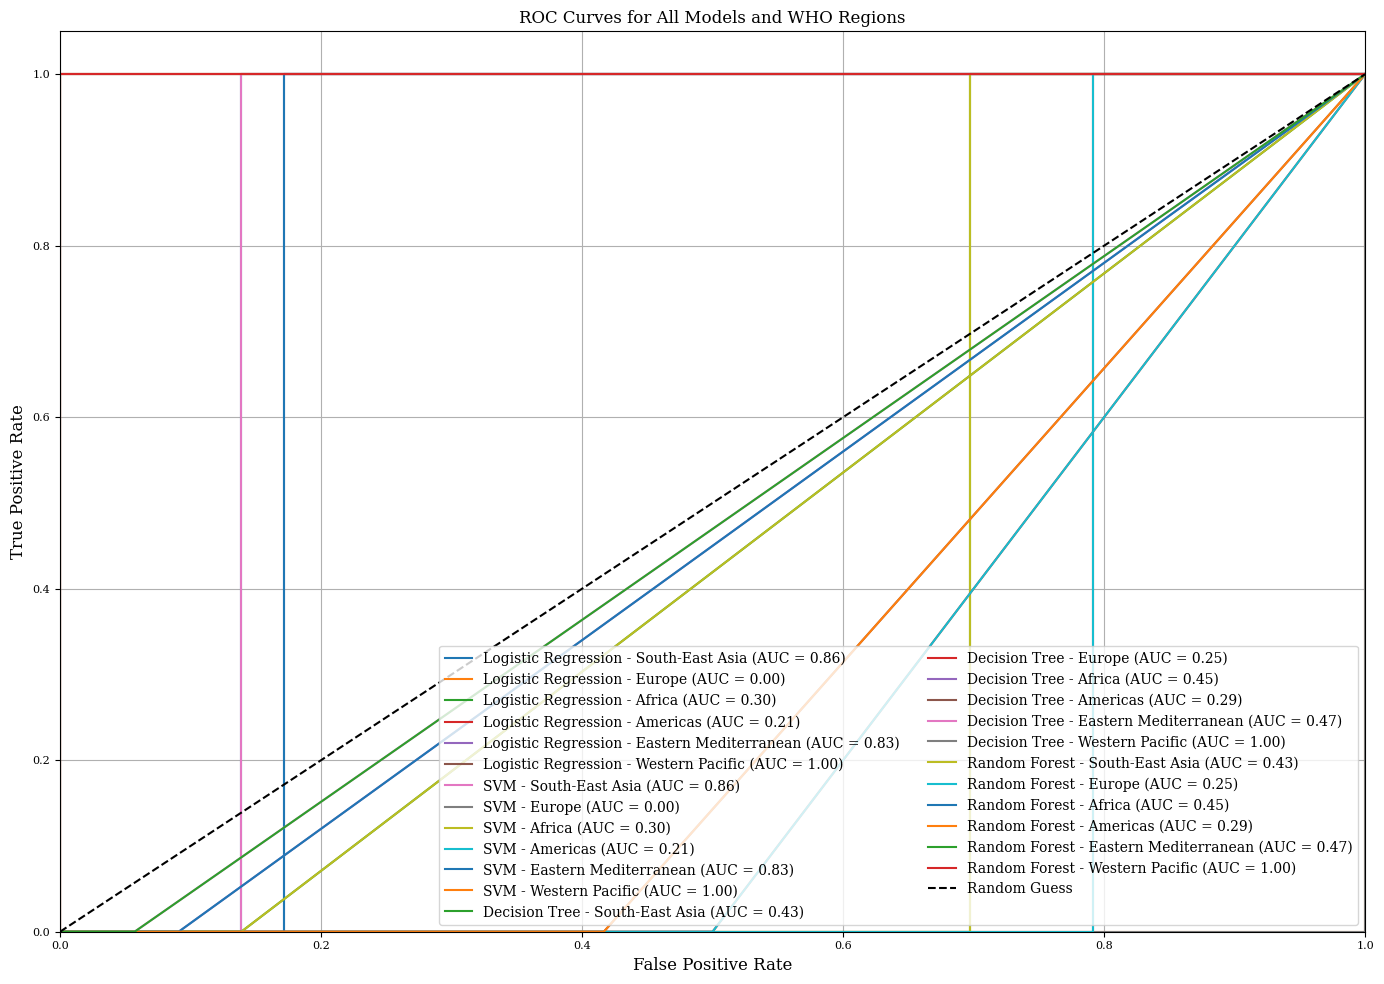

In [62]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from google.colab import drive
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Download necessary NLTK data
try:
    nltk.data.find("corpora/stopwords")
except Exception as e:
    print(f"Error downloading stopwords: {e}")
    nltk.download("stopwords")
try:
    nltk.data.find("corpora/wordnet")
except Exception as e:
    print(f"Error downloading wordnet: {e}")
    nltk.download("wordnet")
try:
    nltk.data.find("corpora/omw-1.4")
except Exception as e:
    print(f"Error downloading omw-1.4: {e}")
    nltk.download("omw-1.4")


# Mount Google Drive
drive.mount('/content/drive')

# Load the dataframe
covid_df = pd.read_csv('/content/country_wise_latest.csv')

# Assuming df is already loaded and preprocessed with 'clean_text' and 'WHO Region'
# Define X and y
df = covid_df.copy()
df = pd.concat([covid_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

# Preprocess the 'WHO Region' column to create 'clean_text' if it doesn't exist
if 'clean_text' not in df.columns:
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text, use_stemming=True):
        # 1. Lowercase
        text = text.lower()

        # 2. Remove punctuation & numbers
        text = re.sub(f"[{string.punctuation}0-9]", " ", text)

        # 3. Remove extra spaces
        text = re.sub(r"\s+", " ", text).strip()

        # 4. Tokenize
        tokens = text.split()

        # 5. Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # 6. Apply stemming OR lemmatization
        if use_stemming:
            # Stemming is not used in the original preprocess_text function in the notebook
            pass
        else:
            tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return " ".join(tokens)

    df["clean_text"] = df["WHO Region"].apply(lambda x: preprocess_text(x, use_stemming=False))


X = df["clean_text"]
y = df["WHO Region"]

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

svm = SVC(kernel='linear', probability=True) # Enable probability estimation for ROC AUC
svm.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=df['WHO Region'].unique())
n_classes = y_test_bin.shape[1]

models = {
    'Logistic Regression': lr,
    'SVM': svm,
    'Decision Tree': dt,
    'Random Forest': rf
}

colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # For classes

plt.figure(figsize=(14, 10))

for model_name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            print(f"Model {model_name} does not support probability or decision scores.")
            continue

        # Compute ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves
        for i in range(n_classes):
             plt.plot(fpr[i], tpr[i],
                     label=f'{model_name} - {df["WHO Region"].unique()[i]} (AUC = {roc_auc[i]:.2f})')

        # Calculate and print overall ROC AUC score for multiclass
        if hasattr(model, "predict_proba"):
             overall_roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr', average='weighted')
             print(f"Overall ROC AUC for {model_name} (weighted OVR): {overall_roc_auc:.2f}")


    except Exception as e:
        print(f"Could not plot ROC for {model_name}: {e}")

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models and WHO Regions')
plt.legend(loc="lower right", fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()